# Recommendation system technique:


step 1. reader Profile

- ask user to rate a random list of books
- which common tags can pique the interest of the users?
- is the user adventurous? to increase randomness in result.
- apply funk SVD for users similar to each other.

!!"Neighborhood-Based Collaborative Filtering, which is based on the idea that we can either correlate items that are similar to provide recommendations or we can correlate users to one another to provide recommendations."

user-based compares similar users  
!!  "User-based collaborative filtering: In this type of recommendation, users related to the user you would like to make recommendations for are used to create a recommendation."

user-based compares similar items (good for tags?)  
!!"Item-based collaborative filtering: In this type of recommendation, first you need to find the items that are most related to each other item (based on similar ratings). Then you can use the ratings of an individual on those similar items to understand if a user will like the new item."


apply collaborative filtering
- which books did he like (4/5) star
- which books did both hate?

notes:
1- problems: who wants to evaluate all Harry Potter sequels?
2- popular often rated books are over represented.
3- a recommendation system is supposed to help you with books that may not be on your radar. chances are that if you are not a Harry Potter fan reader by now, you're never going to be.

apply content based filtering  

in the code:
- 'user' refers to the user of this code.  
- 'reader' refers to the data from the readers data


In [159]:
import matplotlib.pyplot as plt

import time
import numpy as np
import pandas as pd
import random
import operator
from operator import itemgetter
from statistics import mean 

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

df_ratings = pd.read_csv('df_ratings.csv' )
df_books = pd.read_csv('df_books.csv' )
df_tags = pd.read_csv('df_tags.csv' )

## 1. Reader Profile  
### Finding out good books to recommend:

### Define:
- Most books have been rated by 100 to 1000 readers.
- book_id number is relevant as it indicates the length of time it has been in the database.

In order to provide a good insight into a readers preferences, the following techniques will be applied:

1. Which are the most often rated books? Note that there will be a bias towards early entries in the database (indicated by low book_id numbers).  

2. Which books have the highest ratings? These will be weighted across all users, to ensure that unfrequently but highly rated books do not have over-representation.  

3. The books need to be as distinct as possible between themselves and the readers.

In order to do this, a dataframe will be made from the 10,000 books:
- Filter1: the 100 entries with the highest mean ratings (indicating these are good recommendations).
- Filter2: the 100 entries with the highest number of ratings (indicating these are representative of all readers).
- Filter3: 100 random entries from 2 x 100 of the largest book_id values (indicating these are the most recent book additions).

These 300 entries will then be analysed to determine the top 100 that are most distinct from each other.

### Code:

In [5]:
def most_rated (df_ratings, top=100):
    '''
    INPUT
    df_ratings: ratings dataframe
    top: number of books to consider per filter. It is recommended to keep this below 1000 due to memory limitations.
    
    OUTPUT
    returns top_filters list awith a list of book_id's that may be of interest for recommendation.
    '''
    #100 entries with the highest mean ratings
    top_mean=list(df_ratings.groupby(['book_id']).mean().sort_values('rating',ascending=False)[:top].index)
    
    return top_mean

In [6]:
def best_rated (df_ratings, top=100):
    '''
    INPUT
    df_ratings: ratings dataframe
    top: number of books to consider per filter. It is recommended to keep this below 1000 due to memory limitations.
    
    OUTPUT
    returns top_filters list awith a list of book_id's that may be of interest for recommendation.
    '''
    #100 entries with the highest number of ratings:
    top_number=list(df_ratings.groupby('book_id')['rating'].count().sort_values(ascending=False)[:top].index)
    
    return top_number

In [7]:
def recent_rated (df_ratings, top=100):
    '''
    INPUT
    df_ratings: ratings dataframe
    top: number of books to consider per filter. It is recommended to keep this below 1000 due to memory limitations.
    
    OUTPUT
    returns top_filters list awith a list of book_id's that may be of interest for recommendation.
    '''
    #100 entries with the largest book_id values:
    top_id=sorted(df_ratings['book_id'].unique(),reverse=True)[:(2 * top)] #select 2 x 100 entries entries
    
    #consistenly obtain the same random results for testing purposes.
    
    random.seed(3)
    top_id=random.sample(top_id,100) #randomly select a sample of 100 entries
    
    return top_id

### Test:

In [8]:
#book_id for interest

most_rated_list = most_rated (df_ratings, top=100)
best_rated_list = best_rated (df_ratings, top=100)
recent_rated_list = recent_rated (df_ratings, top=100)

In [9]:
print(most_rated_list)

[3628, 7947, 9566, 6920, 8978, 6361, 6590, 4483, 3275, 1788, 5207, 8946, 1308, 9141, 862, 3753, 5580, 8663, 8109, 8569, 4778, 7883, 780, 422, 7254, 9806, 6642, 1010, 9569, 5919, 4868, 2244, 4107, 2767, 2101, 7264, 9076, 7945, 3395, 3230, 6902, 9842, 4708, 8854, 8548, 2149, 2167, 3491, 4410, 8451, 9004, 5754, 6089, 6527, 2093, 3054, 1264, 3736, 3215, 5344, 3095, 3660, 9360, 9470, 3241, 2956, 562, 1618, 2353, 6720, 8976, 9923, 9712, 3082, 7689, 3885, 2527, 2209, 3030, 25, 6659, 4653, 3282, 9319, 1380, 964, 7593, 5376, 9139, 8982, 4522, 4344, 7373, 8926, 6228, 8233, 9943, 8110, 2940, 8187]


In [10]:
print(best_rated_list)

[1, 2, 4, 3, 5, 17, 20, 18, 23, 7, 24, 25, 21, 27, 13, 8, 16, 14, 28, 9, 10, 37, 26, 31, 11, 19, 30, 15, 32, 12, 22, 29, 33, 6, 36, 39, 42, 47, 46, 48, 43, 45, 38, 54, 49, 52, 55, 63, 56, 59, 58, 61, 60, 35, 70, 57, 50, 69, 62, 65, 117, 40, 71, 34, 66, 138, 67, 93, 41, 98, 119, 131, 116, 64, 76, 53, 85, 113, 125, 72, 110, 80, 104, 44, 140, 97, 84, 122, 83, 133, 51, 155, 87, 154, 95, 102, 100, 161, 73, 129]


In [11]:
print(recent_rated_list)

[9940, 9849, 9861, 9967, 9906, 9846, 9879, 9840, 9852, 9984, 9845, 9997, 9880, 9934, 9859, 9941, 9951, 9813, 9862, 9860, 9807, 9899, 9837, 9962, 9816, 9838, 9824, 9867, 9901, 9812, 9810, 9960, 9802, 9990, 9923, 9993, 9932, 9821, 9848, 9829, 9891, 9822, 9853, 9887, 9966, 9907, 9976, 9991, 9811, 9874, 9945, 9814, 9889, 9835, 9893, 9871, 9902, 9911, 9864, 9896, 9825, 9914, 9836, 9929, 9959, 9917, 9974, 9946, 9823, 9928, 9969, 9831, 9877, 9841, 9919, 9939, 9989, 9956, 9898, 9992, 9948, 9886, 9981, 9998, 9963, 9868, 9857, 9947, 9843, 9985, 9995, 9854, 9922, 9903, 9850, 9952, 9909, 9925, 9958, 9930]


## 2. Reader Profile  
### Finding out good and *distinct* books to recommend:

*How distinct are the book_id ? These are too many for someone to build a profile. Recommend 100.

### Define:
- create dummy variables for all books

apply SKmeans with 100 clusters. choose those that are furthest from eahch other

In [12]:
def clusters(df_ratings,book_list, clusters=100):
    '''
    INPUT: 
    - input the df_ratings
    - the top number of recommnedations of interest
    - book_list - a list with the books of interest to find clusters
    
    
    OUTPUT:
    - return list with book_ids that are good recommendations.
    
    '''
    #create a dataframe containing the books from the 3 filters of interest
    df_filters=df_ratings[df_ratings['book_id'].isin(book_list)]
    
    #unstack the dataframe
    df_filters = df_filters.groupby(['user_id', 'book_id'])['rating'].max().unstack()
    
    #fill the N/A with "0", and all non-N/A values with "1".
    #https://stackoverflow.com/questions/37543647/
    #how-to-replace-all-non-nan-entries-of-a-dataframe-with-1-and-all-nan-with-0
    df_filters = df_filters.notnull().astype('int')
    
    #Transpose so that books are in the rows index; and fill all NA values with 0.
    df_filters=df_filters.T
        
    #create kmeans object
    kmeans_filters = KMeans(clusters).fit(df_filters)
    
    #create a dictionary containing all the books from book_list with their corresponding clusters
    cluster_dic={}
    
#    for book in range (len(book_list)):
    for book in book_list:
        
        book_test=np.array(df_filters.loc[book])
        book_test=book_test.reshape(1, -1)
        cluster=kmeans_filters.predict(book_test)

        cluster_dic.update({book:int(cluster)})
        
    return cluster_dic

In [13]:
def unique_keys(cluster_dic):
    
    #https://stackoverflow.com/questions/8749158/removing-duplicates-from-dictionary
    books_result={}

    for key,value in cluster_dic.items():
        if value not in books_result.values():
            books_result[key] = value
    
    #return a list of book_ids all belonging to different clusters.
    return list(books_result.keys())

In [14]:
def get_book_titles(booklist):
    '''
    INPUT: book list
    OUTPUT: dictionary with titles
    '''
    
    df_mask=df_books[df_books['book_id'].isin(booklist)][['book_id','title','authors']]
    titles_dict = dict(zip(df_mask['book_id'], df_mask['title'].str.cat(df_mask[['authors']], sep=' - by: ')))
    
    return titles_dict

In [15]:
most_rated_clusters=clusters(df_ratings,most_rated_list, clusters=20)
most_rated_keys=unique_keys(most_rated_clusters)

best_rated_clusters=clusters(df_ratings,best_rated_list, clusters=20)
best_rated_keys=unique_keys(best_rated_clusters)

recent_rated_clusters=clusters(df_ratings,recent_rated_list, clusters=20)
recent_rated_keys=unique_keys(recent_rated_clusters)

#Find unique values from the 3 filters:
top_filters=sorted(list(set(most_rated_keys)|set(best_rated_keys)|set(recent_rated_keys)))    

In [16]:
query_dict=get_book_titles(top_filters)

In [17]:
query_dict

{1: 'The Hunger Games (The Hunger Games, #1) - by: Suzanne Collins',
 2: "Harry Potter and the Sorcerer's Stone (Harry Potter, #1) - by: J.K. Rowling",
 3: 'Twilight (Twilight, #1) - by: Stephenie Meyer',
 4: 'To Kill a Mockingbird - by: Harper Lee',
 7: 'The Hobbit - by: J.R.R. Tolkien',
 9: 'Angels & Demons  (Robert Langdon, #1) - by: Dan Brown',
 10: 'Pride and Prejudice - by: Jane Austen',
 11: 'The Kite Runner - by: Khaled Hosseini',
 12: 'Divergent (Divergent, #1) - by: Veronica Roth',
 13: '1984 - by: George Orwell',
 16: 'The Girl with the Dragon Tattoo (Millennium, #1) - by: Stieg Larsson',
 18: 'Harry Potter and the Prisoner of Azkaban (Harry Potter, #3) - by: J.K. Rowling',
 25: 'Harry Potter and the Deathly Hallows (Harry Potter, #7) - by: J.K. Rowling',
 30: 'Gone Girl - by: Gillian Flynn',
 31: 'The Help - by: Kathryn Stockett',
 36: 'The Giver (The Giver, #1) - by: Lois Lowry',
 37: 'The Lion, the Witch, and the Wardrobe (Chronicles of Narnia, #1) - by: C.S. Lewis',
 39:

#### This list provides a good balance of books:
- popularity
- high rating
- novelty 

## 3. Reader Profile  
### Ask the user to rate the books:

In [18]:
def query_book_ratings(query_dict):
    
    '''
    INPUT:
    dictionary with the most representative books.
    
    OUTPUT:
    returns a dictionary with key: tag_id; and value: user book rating
    '''
    
    user_ratings={}
    
    counter=1
    
    print("Please evaluate these 60 books. Instructions: \n \
    - Please rate from 1 to 5. \n \
    - Enter 0 if you haven't read the book. \n \
    - Enter 99 if you want to stop rating.")

    for book in list(query_dict.keys()):
    
        while True:
            
            try:
                print("* Book Rating",counter, "/ 60")
                print(query_dict.get(book))
                rating=int(input("Your rating: "))
            
            except ValueError:
                print("Sorry, I didn't understand that.")
                continue
            
            if rating==99:
                break
                
            if rating <1 or rating>5:
                print("Please rate from 1 to 5.")
                continue
                
            else:
                user_ratings.update({book:rating})
                break
        counter+=1
        
        if rating==99:
            break
        
    return user_ratings

In [19]:
user_ratings=query_book_ratings(query_dict)

Please evaluate these 60 books. Instructions: 
     - Please rate from 1 to 5. 
     - Enter 0 if you haven't read the book. 
     - Enter 99 if you want to stop rating.
* Book Rating 1 / 60
The Hunger Games (The Hunger Games, #1) - by: Suzanne Collins
Your rating: 4
* Book Rating 2 / 60
Harry Potter and the Sorcerer's Stone (Harry Potter, #1) - by: J.K. Rowling
Your rating: 4
* Book Rating 3 / 60
Twilight (Twilight, #1) - by: Stephenie Meyer
Your rating: 4
* Book Rating 4 / 60
To Kill a Mockingbird - by: Harper Lee
Your rating: 4
* Book Rating 5 / 60
The Hobbit - by: J.R.R. Tolkien
Your rating: 4
* Book Rating 6 / 60
Angels & Demons  (Robert Langdon, #1) - by: Dan Brown
Your rating: 4
* Book Rating 7 / 60
Pride and Prejudice - by: Jane Austen
Your rating: 99


## 3. Reader Profile  
### Ask the user which genres he likes:

In [20]:
genres={1:'action', 2:'adult', 3:'adventure', 4:'all-time-favorites', 5:'american', 6:'biography', \
        7:'bookclub', 8:'british', 9:'children', 10:'classics', 11:'comedy', 12:'coming-of-age', \
        13:'contemporary', 14:'crime', 15:'drama', 16:'english', 17:'family', 18:'fantasy', 19:'friendship' , \
        20:'historical', 21:'history', 22:'horror', 23:'kids', 24:'literature', 25:'love', 26:'magic',\
        27:'mystery', 28:'non-fiction', 29:'paranormal', 30:'philosophy', 31:'relationships', 32:'romance' , \
        33:'school', 34:'sci-fi', 35:'suspense', 36:'teen', 37:'war', 38:'women', 39:'SURPRISE-ME!' }

def query_genre_likes(genres):
    
    user_genres=[]
    
    counter=1
    
    print ("Please enter your genres of interest: \n \
    1: action , 2: adult , 3: adventure , 4: all-time-favorites , 5: american , 6: biography , 7: bookclub ,\
    8: british , 9: children , 10: classics , 11: comedy , 12: coming-of-age , 13: contemporary , 14: crime ,\
    15: drama , 16: english , 17: family , 18: fantasy , 19: friendship , 20: historical , 21: history ,\
    22: horror , 23: kids , 24: literature , 25: love , 26: magic , 27: mystery , 28: non-fiction ,\
    29: paranormal , 30: philosophy , 31: relationships , 32: romance , 33: school , 34: sci-fi , 35: suspense ,\
    36: teen , 37: war , 38: women , 39: SURPRISE-ME")

    print ("Type 99 when finished.")
    
    while True:
        
        try:
            genre=int(input("Please type genre and ENTER: "))
            
        except ValueError:
            print ("Sorry, I didn't understand that.")
            continue
        
        if genre==99:
            break
        
        if counter>10:
            break
        
        if genre in user_genres:
            print ("This genre was already included.")
        
        if genre<1 or genre>39:
            print ("Please limit to the choices listed.")
            continue
        else:
            user_genres.append(genre)
        print("99 ENTER when finished.\n")
        
    counter+=1
    
    return sorted(list(set(user_genres)))

user_genres=query_genre_likes(genres)
        
print ("Your genres selection",user_genres)        

Please enter your genres of interest: 
     1: action , 2: adult , 3: adventure , 4: all-time-favorites , 5: american , 6: biography , 7: bookclub ,    8: british , 9: children , 10: classics , 11: comedy , 12: coming-of-age , 13: contemporary , 14: crime ,    15: drama , 16: english , 17: family , 18: fantasy , 19: friendship , 20: historical , 21: history ,    22: horror , 23: kids , 24: literature , 25: love , 26: magic , 27: mystery , 28: non-fiction ,    29: paranormal , 30: philosophy , 31: relationships , 32: romance , 33: school , 34: sci-fi , 35: suspense ,    36: teen , 37: war , 38: women , 39: SURPRISE-ME
Type 99 when finished.
Please type genre and ENTER: 1
99 ENTER when finished.

Please type genre and ENTER: 2
99 ENTER when finished.

Please type genre and ENTER: 3
99 ENTER when finished.

Please type genre and ENTER: 499
Please limit to the choices listed.
Please type genre and ENTER: 99
Your genres selection [1, 2, 3]


## 2. User Profile

### Find out which readers are like the user...

### Define:

split into multiples of 16
1 - > (53424 / 16) * random (1 to 16) - this selects the range

1. Problem: it takes 20 seconds to review 2000 users
2. Memory problem: it cannot handle 35,000 users. 

In order to add serendipity to the problem, increase speed, and manage memory, a random selection from 16 slots are selected.

split into multiples of 16
1 - > (53424 / 16) * random (1 to 16) - this selects the range
to add serendipity, change the 35,000 choose different 3,339 starting point.

This provides the nice benefit of getting different recommendations every time you run the simulations.

In [21]:
def weighted_mean(df_ratings, user_ratings, sample_size = 8000):
    
    '''   
    INPUT:
    - df_ratings: dataframe containing book ratings. Ratings arranged by columns: user_id; book_id; rating.
    - user_ratings: dictionary containing user's book ratings. Arranged by book_id (key) and rating (value).
    - sample_size: integer. Size of random sample from all the readers' ratings.
    
    OUTPUT:
    - book_wmeans: dictionary containing weighted means for every book that the user has not already rated.
      Arranged by book_id (key), and rating (value) in descending order.
    '''
    
    #randomly select a sample of size "sample_size" among the 53,424 readers.
    random.seed(6)
    random_ids=random.sample(list(df_ratings['user_id'].unique()),sample_size) #randomly select a sample of 
    
    #unstack the readers' ratings to a dataframe containing book ratings.
    #Ratings arranged by readers (rows) and books (columns).
    df_reader_ratings=df_ratings[df_ratings['user_id'].isin(random_ids)].\
                                                    groupby(['user_id', 'book_id'])['rating'].max().unstack()
           
    #Add a new row "0" for the User.
    df_reader_ratings.loc[0] = None

    #Sort df_reader_ratings index so that the new row "0" is shown at the top:
    df_reader_ratings=df_reader_ratings.sort_index()

    #Populate row "0" according to the user's ratings included in user_ratings.
    for key in list(user_ratings.keys()):        
        df_reader_ratings.loc[0][key]=user_ratings.get(key)
        
    #create a copy of the unstacked dataframe filling all NaN values with zero's.
    df_reader_ratings_dummy=df_reader_ratings.copy().fillna(0)
    
    #create a matrix with all the cosine similarities between readers.
    cosine_ratings=cosine_similarity(df_reader_ratings_dummy,df_reader_ratings_dummy)
    
    #create a dataframe from the cosine_ratings matrix. Rows = users; Columns = users.
    cosine_ratings=pd.DataFrame(cosine_ratings,index=df_reader_ratings.index,columns=df_reader_ratings.index)
    
    #dictionary to contain weighted means for each book. 
    book_wmeans={}
    
    #get a series containing the cosine similarity between User (row 0) and every other user     
    cosine_reader=cosine_ratings[0]
            
    #For every book with rating:
    for book in list(df_reader_ratings.columns):
        
    #If book has not already been rated by the user:
        if book not in list(user_ratings.keys()):

            #ratings of the book in iteration by all readers.
            reader_ratings=df_reader_ratings[book] #all of the reader ratings for given book 'book'

            #index containing the rreaders with NaN ratings for the book in iteration.        
            #https://stackoverflow.com/questions/14016247/find-integer-index-of-rows-with-nan-in-pandas-dataframe
            idx_nans = reader_ratings[reader_ratings.isnull()].index #which indices contained NaNs
    
            #ratings of the book in iteration by all readers without any NaNs.
            reader_ratings=df_reader_ratings[book].dropna()

            #remove the readers identified with NaN values for the book in iteration.
            cosine_book=cosine_reader.drop(index=idx_nans)
        
            #carry out the dot product between both series. These do not contain NaN values.
            wmean_rating=np.dot(cosine_book,reader_ratings)/cosine_reader.sum()

            #include weighted mean in dictionary.
            book_wmeans.update({book:wmean_rating})
    
    #sort dictionary value items in descending order.
    book_wmeans=sorted(book_wmeans.items(), key=operator.itemgetter(1),reverse=True)
    
    return book_wmeans

In [22]:
start_time = time.time()

book_wmeans=weighted_mean(df_ratings, user_ratings, sample_size = 8000)
    
elapsed_time = time.time() - start_time

print(elapsed_time)

55.031331062316895


In [23]:
print(user_ratings)

{1: 4, 2: 4, 3: 4, 4: 4, 7: 4, 9: 4}


In [24]:
print(book_wmeans[:10])

[(18, 1.8546964550928295), (25, 1.8379041143168946), (24, 1.8231934749778242), (27, 1.7868036359610548), (21, 1.7608980188821657), (23, 1.7455769184671073), (17, 1.7280158157692713), (5, 1.5870018544445295), (20, 1.5061994755551746), (19, 1.5032791075723293)]


In [25]:
book_recommends=list(map(itemgetter(0), book_wmeans))

In [26]:
print(book_recommends)

[18, 25, 24, 27, 21, 23, 17, 5, 20, 19, 10, 16, 13, 37, 8, 14, 11, 31, 26, 28, 15, 39, 12, 33, 32, 22, 29, 36, 42, 47, 43, 6, 46, 38, 45, 30, 54, 50, 48, 70, 52, 62, 56, 59, 63, 49, 55, 58, 60, 57, 41, 66, 67, 117, 53, 35, 65, 76, 93, 85, 69, 64, 51, 89, 40, 110, 133, 98, 155, 161, 71, 73, 119, 87, 72, 84, 44, 135, 116, 68, 131, 122, 80, 77, 90, 140, 104, 97, 100, 102, 83, 129, 138, 75, 125, 103, 79, 86, 118, 34, 61, 142, 189, 123, 81, 171, 113, 154, 205, 109, 165, 219, 168, 137, 126, 95, 198, 158, 150, 188, 160, 132, 134, 130, 114, 186, 106, 105, 136, 111, 94, 115, 167, 179, 148, 124, 229, 153, 197, 184, 204, 121, 78, 101, 185, 212, 292, 195, 157, 74, 178, 82, 289, 248, 159, 265, 145, 91, 176, 172, 143, 225, 230, 144, 173, 175, 120, 271, 141, 245, 112, 223, 139, 192, 270, 92, 200, 201, 233, 151, 217, 181, 227, 170, 278, 183, 180, 177, 162, 187, 321, 209, 264, 191, 88, 146, 241, 108, 216, 215, 107, 368, 214, 263, 325, 281, 196, 207, 232, 295, 243, 99, 231, 199, 335, 258, 163, 322, 337,

## 2. Testing the Recommendation Engine

### Check and compare how users would have rated

In [27]:
n_user=df_ratings['user_id'].nunique()

print ("There are " +str(n_user)+ " number of unique readers in the dataset.")


There are 53424 number of unique readers in the dataset.


How many users should we compare against to provide an optimum recommendation?

In [107]:
def recommends_score (df_ratings,sample_size=10,test_size=100):

    random.seed(6)
    
    random_ids=random.sample(list(df_ratings['user_id'].unique()),test_size) #randomly select a sample of 100 entries  

    accuracy=[]
    
    for id in random_ids:
        #create small dataframe containing the random_id user's ratings:
        df_user=df_ratings[df_ratings['user_id']==id]
         
        msk = np.random.rand(len(df_user)) < 0.5
        df_val = df_user[msk] #keep this away for validation
        df_test = df_user[~msk] #to feed into engine
        
        #store the random_id user's book_ids and ratings in a dictionary:
        val_ratings=pd.Series(df_val['rating'].values,index=df_val['book_id']).to_dict() #validation and unseen
        test_ratings=pd.Series(df_test['rating'].values,index=df_test['book_id']).to_dict() #feed test data to engine
        
        #random user_id maximum rating (likely to return "5", sometimes "4").
        max_rating=max(test_ratings.items(), key=operator.itemgetter(1))[1]
       
        #the dataframe to feed into engine should exclude the random user's data already contained there.
        df_ratings=df_ratings[df_ratings['user_id']!=id]
        
        #feed test data to engine    
        wmeans_test=weighted_mean(df_ratings, test_ratings, sample_size)
   
        #validation data top rated books
        val_best=[]
        for key, value in val_ratings.items():
            if value == max_rating:
                val_best.append(key)
        
        test_best=[]
        #make a list from the weighted_mean output best books. The length is made the same as the validation data
        test_best=list(map(itemgetter(0), wmeans_test))[:len(val_best)] 

        overlap = set(test_best) & set(val_best)
        
        if len(test_best)>0:
            #add accuracy score for random user into a list
            acc=float(len(overlap)/len(test_best))
                
        else:
            acc=0

        accuracy.append(acc)
        
    #return a list with all the accuracy values from randomly selected samples
    
    return accuracy

## 2. Testing the Recommendation Engine

### How many users should we compare against to provide an optimum recommendation?

In [27]:
n_user=df_ratings['user_id'].nunique()

print ("There are " +str(n_user)+ " number of unique readers in the dataset.")

There are 53424 number of unique readers in the dataset.


In [142]:
def create_df_tests():
    
    samples_list=[]
    accuracy_list=[]
    time_list=[]
    
    for samples in range (10,1000,20):
        
        start_time = time.time()
        
        accuracy=recommends_score (df_ratings,sample_size=samples,test_size=20)
    
        elapsed_time = time.time() - start_time
        
        print("Number of Readers comparisons used:", samples)
        samples_list.append(samples)

        print("Mean accuracy from 20 tests from random users:", mean(accuracy))
        accuracy_list.append(mean(accuracy))

        print("Simulation time per test",elapsed_time/test_size)
        time_list.append(elapsed_time)
    
    df_tests = pd.DataFrame(list(zip(samples_list,accuracy_list, time_list)), columns =['samples','accuracy', 'time'])
    
    return df_tests

In [143]:
df_tests = create_df_tests()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in double_scalars


Number of Readers comparisons used: 10
Mean accuracy from 20 tests from random users: 0.0597323007732847
Simulation time per test 2.473666286468506
Number of Readers comparisons used: 30
Mean accuracy from 20 tests from random users: 0.07221331675967768
Simulation time per test 5.420547652244568
Number of Readers comparisons used: 50
Mean accuracy from 20 tests from random users: 0.08864211868066772
Simulation time per test 8.199966740608215
Number of Readers comparisons used: 70
Mean accuracy from 20 tests from random users: 0.09665871609134498
Simulation time per test 10.278455543518067
Number of Readers comparisons used: 90
Mean accuracy from 20 tests from random users: 0.1039975710563946
Simulation time per test 12.704604029655457
Number of Readers comparisons used: 110
Mean accuracy from 20 tests from random users: 0.08719674597581574
Simulation time per test 14.137927365303039
Number of Readers comparisons used: 130
Mean accuracy from 20 tests from random users: 0.111053756371008

In [157]:
df_tests.head()

,samples,accuracy,time
0,10,0.059732,24.736663
1,30,0.072213,54.205477
2,50,0.088642,81.999667
3,70,0.096659,102.784555
4,90,0.103998,127.046040


In [158]:
df_tests.tail()

,samples,accuracy,time
45,910,0.103324,636.090267
46,930,0.091386,646.818318
47,950,0.118701,643.814640
48,970,0.100860,656.003847
49,990,0.107679,670.376143


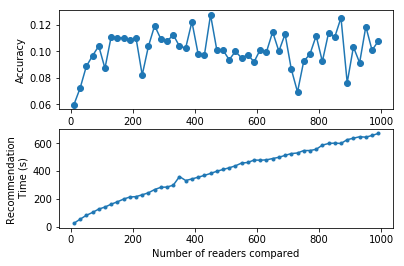

In [160]:
x1 = df_tests['samples']

y1 = df_tests['accuracy']
y2 = df_tests['time']

plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'o-')
plt.title('')
plt.ylabel('Accuracy')

plt.subplot(2, 1, 2)
plt.plot(x1, y2, '.-')
plt.xlabel('Number of readers compared')
plt.ylabel('Recommendation \n \
Time (s)')

plt.savefig('testing_times.png');
plt.show()

## 2. Include tags to improve the output

### Check and compare how users would have rated

In [ ]:
def genre_filter(user_genres,user_ratings,book_recommends,number=5):
    '''
    INPUT:
    user_id1 - the first user_id of an individual as int
    user_id2 - the second user_id of an individual as int
    
    OUTPUT:
    pw_dist - float value with the distance between user_id1 and used_id2 (smaller values indicate greater similarity)
    '''
    
    #books corresponding to user tag preferences.
    df_book_filter=df_tags[df_tags['tag_id'].isin(user_genres)]
    
    #filter out books already rated by user.
    df_book_filter=df_book_filter[~df_book_filter['book_id'].isin(list(user_ratings.keys()))]
    
    #filter for books included in book_recommends.
    df_book_filter=df_book_filter[df_book_filter['book_id'].isin(book_recommends[:number])]
    
    if df_book_filter.shape[0]<number:
        
        print("Please try including more tags in your selection.")            
        
    
    final_recommend=get_book_titles(list(df_book_filter['book_id']))
    
    return final_recommend

In [ ]:
print(genre_filter(user_genres,user_ratings,book_recommends,number=5))